# HCS Data Exploration

## Imports and Configurations

In [16]:
import sys  # Standard library imports

from factor_analyzer import FactorAnalyzer  # Third party imports
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sys.path.append("../src")  # Local application/library specific imports
from scripts.utilities import convert_fractional_date


In [3]:
hcs_df = pd.read_csv("../data/HCS/HCS_parameters_update_CR2257.csv")

# Data Wrangling

In [4]:
# gather datetime information from fractional dates provided
hcs_df['year'] = hcs_df['fyear_CS'].apply(lambda x: int(str(x).split('.')[0]))
hcs_df['date'] = hcs_df['fyear_CS'].apply(lambda x: convert_fractional_date(x))
hcs_df['date'].describe()

count                              616
mean     1999-05-27 16:05:23.106311552
min         1976-06-09 08:32:22.416001
25%      1987-12-03 03:52:12.755999744
50%      1999-05-27 22:07:55.704000512
75%      2010-11-19 06:30:30.276002048
max         2022-05-13 23:58:07.679999
Name: date, dtype: object

# Exploration

In [5]:
# print information about the dataframe
print(f"Shape: {hcs_df.shape}")
hcs_df.info()

Shape: (616, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cr_temp      616 non-null    int64         
 1   fyear_CS     616 non-null    float64       
 2   sddv_CS      616 non-null    float64       
 3   SD_70        616 non-null    float64       
 4   SD_70_north  616 non-null    float64       
 5   SD_70_south  616 non-null    float64       
 6   slop_CS      616 non-null    float64       
 7   SL_70        616 non-null    float64       
 8   SL_70_north  616 non-null    float64       
 9   SL_70_south  616 non-null    float64       
 10  ave_slop_CS  616 non-null    float64       
 11  HCS_length   616 non-null    object        
 12  HCS_area     596 non-null    float64       
 13  year         616 non-null    int64         
 14  date         616 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64

`HCS_length` is object type because it has a few rows with non-float like values e.g., `368.90637228263.707031``. Should investigate what this means. 

In [6]:
# investigate missing values
print(hcs_df.isna().sum())
hcs_df_nona = hcs_df.dropna()
hcs_df[hcs_df['HCS_area'].isna()]

cr_temp         0
fyear_CS        0
sddv_CS         0
SD_70           0
SD_70_north     0
SD_70_south     0
slop_CS         0
SL_70           0
SL_70_north     0
SL_70_south     0
ave_slop_CS     0
HCS_length      0
HCS_area       20
year            0
date            0
dtype: int64


,cr_temp,fyear_CS,sddv_CS,SD_70,SD_70_north,SD_70_south,slop_CS,SL_70,SL_70_north,SL_70_south,ave_slop_CS,HCS_length,HCS_area,year,date
39,1681,1979.352173,23.050886,20.928221,21.072893,20.494844,802.773743,795.916016,494.458984,293.884552,4.865295,581.44183322943.103516,NaN,1979,1979-05-09 13:02:07.728000
42,1684,1979.575806,25.508272,21.703094,20.373978,22.019829,374.015015,366.244934,248.588013,115.931877,3.495467,378.50064134801.347656,NaN,1979,1979-07-30 04:03:38.016002
45,1687,1979.799805,23.296801,18.661228,18.451649,18.728991,579.040100,565.149475,478.089508,84.035324,4.825334,337.27917512519.793945,NaN,1979,1979-10-19 22:17:30.480003
47,1689,1979.949341,21.316271,19.472345,18.849659,20.037155,1107.385254,1105.544678,403.287292,668.846436,5.890347,601.32934635480.246094,NaN,1979,1979-12-13 12:13:37.776000
69,1711,1981.590698,17.143057,17.143057,18.936176,14.962254,310.206909,310.206909,172.119019,131.289795,1.762539,438.34710729124.953125,NaN,1981,1981-08-04 14:30:52.127999
78,1720,1982.263794,15.647516,15.647516,15.864513,15.294233,183.148773,183.148773,33.783222,140.522476,1.465190,252.35899413350.006836,NaN,1982,1982-04-07 06:50:07.583999
167,1809,1988.908691,13.895020,13.895020,14.492928,12.591744,256.423492,256.423492,184.987076,65.751709,1.633271,369.12863220487.210938,NaN,1988,1988-11-27 16:07:59.376003
171,1813,1989.207886,20.237234,19.577274,18.917437,20.027634,629.308350,624.204346,436.294983,180.893311,3.680166,576.50262522425.298828,NaN,1989,1989-03-17 21:04:52.895997
179,1821,1989.804932,22.526665,19.524065,20.234205,18.682356,242.988113,240.052032,169.158707,60.733307,1.869139,495.49102848206.304688,NaN,1989,1989-10-21 19:12:15.552000
314,1956,1999.887573,23.693529,20.988781,21.540363,19.613396,731.045105,724.291016,506.845947,204.880524,4.038923,628.26770027367.851563,NaN,1999,1999-11-20 23:08:22.127999


`HCS_area` has 20 missing values which we should ask about. What do missing values indicate? 

In [7]:
# proportion of dataset that contains unique values
(hcs_df.nunique()/len(hcs_df)*100).sort_values(ascending=False)

cr_temp        100.000000
fyear_CS       100.000000
date           100.000000
sddv_CS         99.837662
SD_70           99.837662
SD_70_north     99.837662
SD_70_south     99.837662
slop_CS         99.837662
SL_70           99.837662
SL_70_north     99.837662
SL_70_south     99.837662
ave_slop_CS     99.837662
HCS_length      99.837662
HCS_area        96.590909
year             7.629870
dtype: float64

In [8]:
hcs_df.describe().drop(columns=['fyear_CS']) # drop the fractional year column

,cr_temp,sddv_CS,SD_70,SD_70_north,SD_70_south,slop_CS,SL_70,SL_70_north,SL_70_south,ave_slop_CS,HCS_area,year,date
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,596.000000,616.000000,616
mean,1949.500000,13.443172,13.069014,12.443054,12.942022,395.372919,389.992815,211.950206,150.744176,2.691969,886.252966,1998.902597,1999-05-27 16:05:23.106311552
min,1642.000000,1.841347,1.841347,1.345982,1.344595,7.089793,7.089793,2.758448,2.867834,0.089744,148.888626,1976.000000,1976-06-09 08:32:22.416001
25%,1795.750000,8.206198,8.206198,7.056436,8.257072,47.375711,47.375711,20.285056,23.901317,0.457463,448.658364,1987.000000,1987-12-03 03:52:12.755999744
50%,1949.500000,12.976606,12.976606,12.241110,12.911891,161.837066,161.837066,67.132710,65.584690,1.245355,584.331970,1999.000000,1999-05-27 22:07:55.704000512
75%,2103.250000,18.792511,18.379632,18.155626,18.049276,456.660309,454.493645,201.065273,170.992901,3.176744,719.399856,2010.000000,2010-11-19 06:30:30.276002048
max,2257.000000,25.508272,22.579355,25.071970,24.830502,8278.967773,8274.589844,7159.270508,5260.224121,44.751179,9568.851563,2022.000000,2022-05-13 23:58:07.679999
std,177.968162,6.086021,5.587241,6.114018,5.831173,724.404814,716.791825,493.842421,314.712774,4.431123,1326.617525,13.295770,NaN


## Univariate Analysis


### Kernel Density Plots

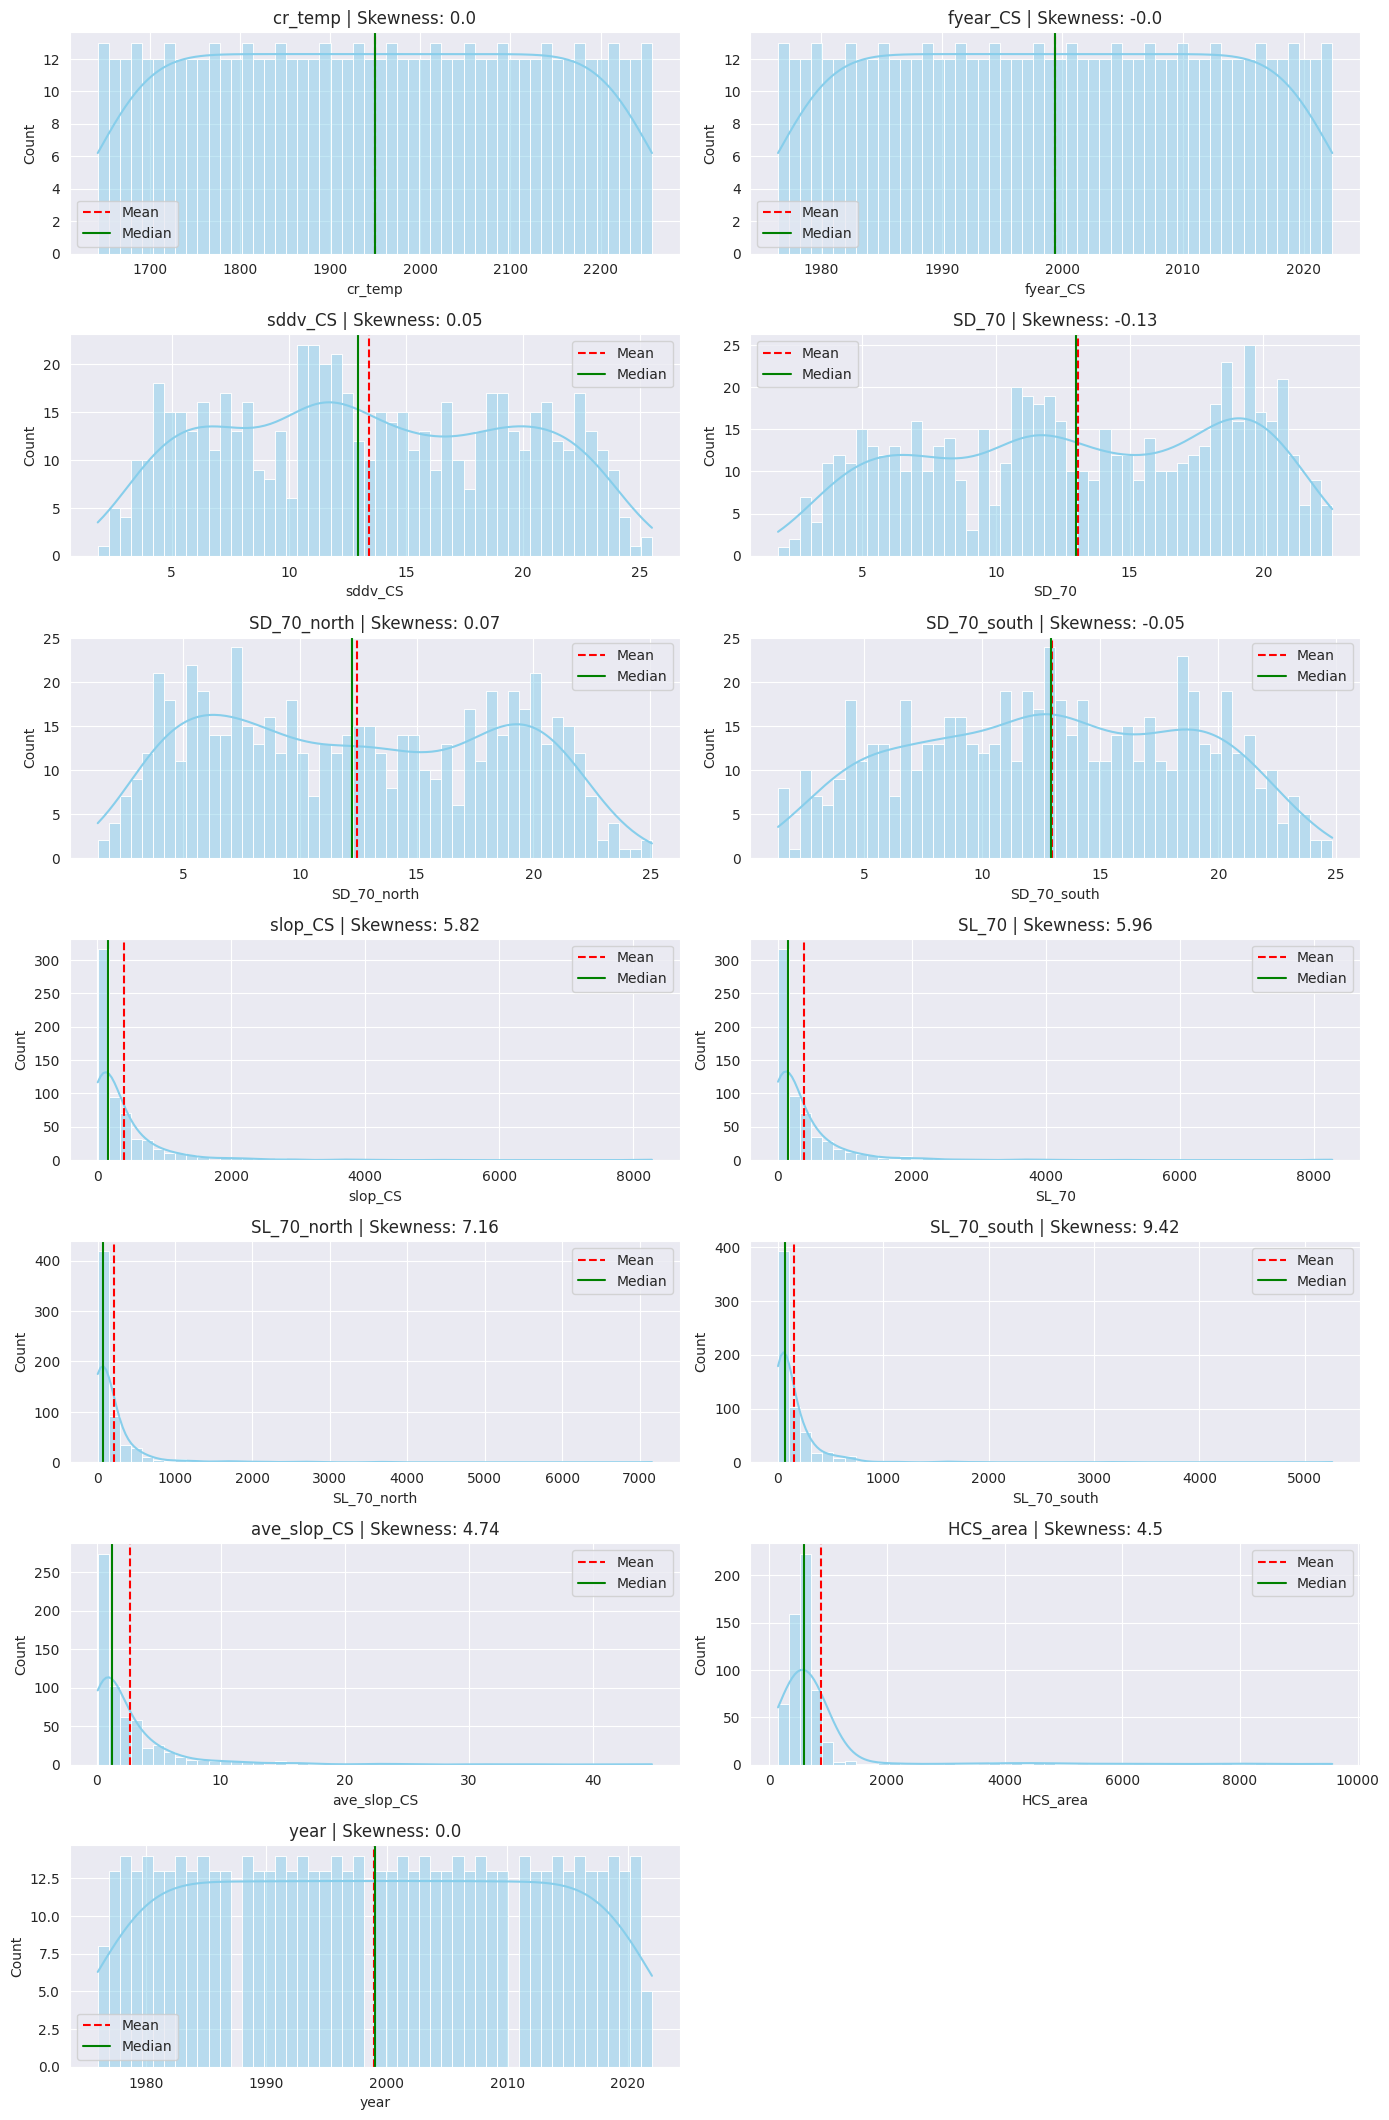

In [9]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = hcs_df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(hcs_df[feature], kde=True, bins=50, color="skyblue")
    
    # Add lines for mean and median
    plt.axvline(hcs_df[feature].mean(), color='r', linestyle='--',label='Mean')
    plt.axvline(hcs_df[feature].median(), color='g', linestyle='-',label='Median')
    
    plt.title(f"{feature} | Skewness: {round(hcs_df[feature].skew(), 2)}")
    plt.legend()  # Add a legend

 
# Adjust layout and show plots
plt.tight_layout()
plt.show()


## Bivariate analysis

<Figure size 1000x600 with 0 Axes>

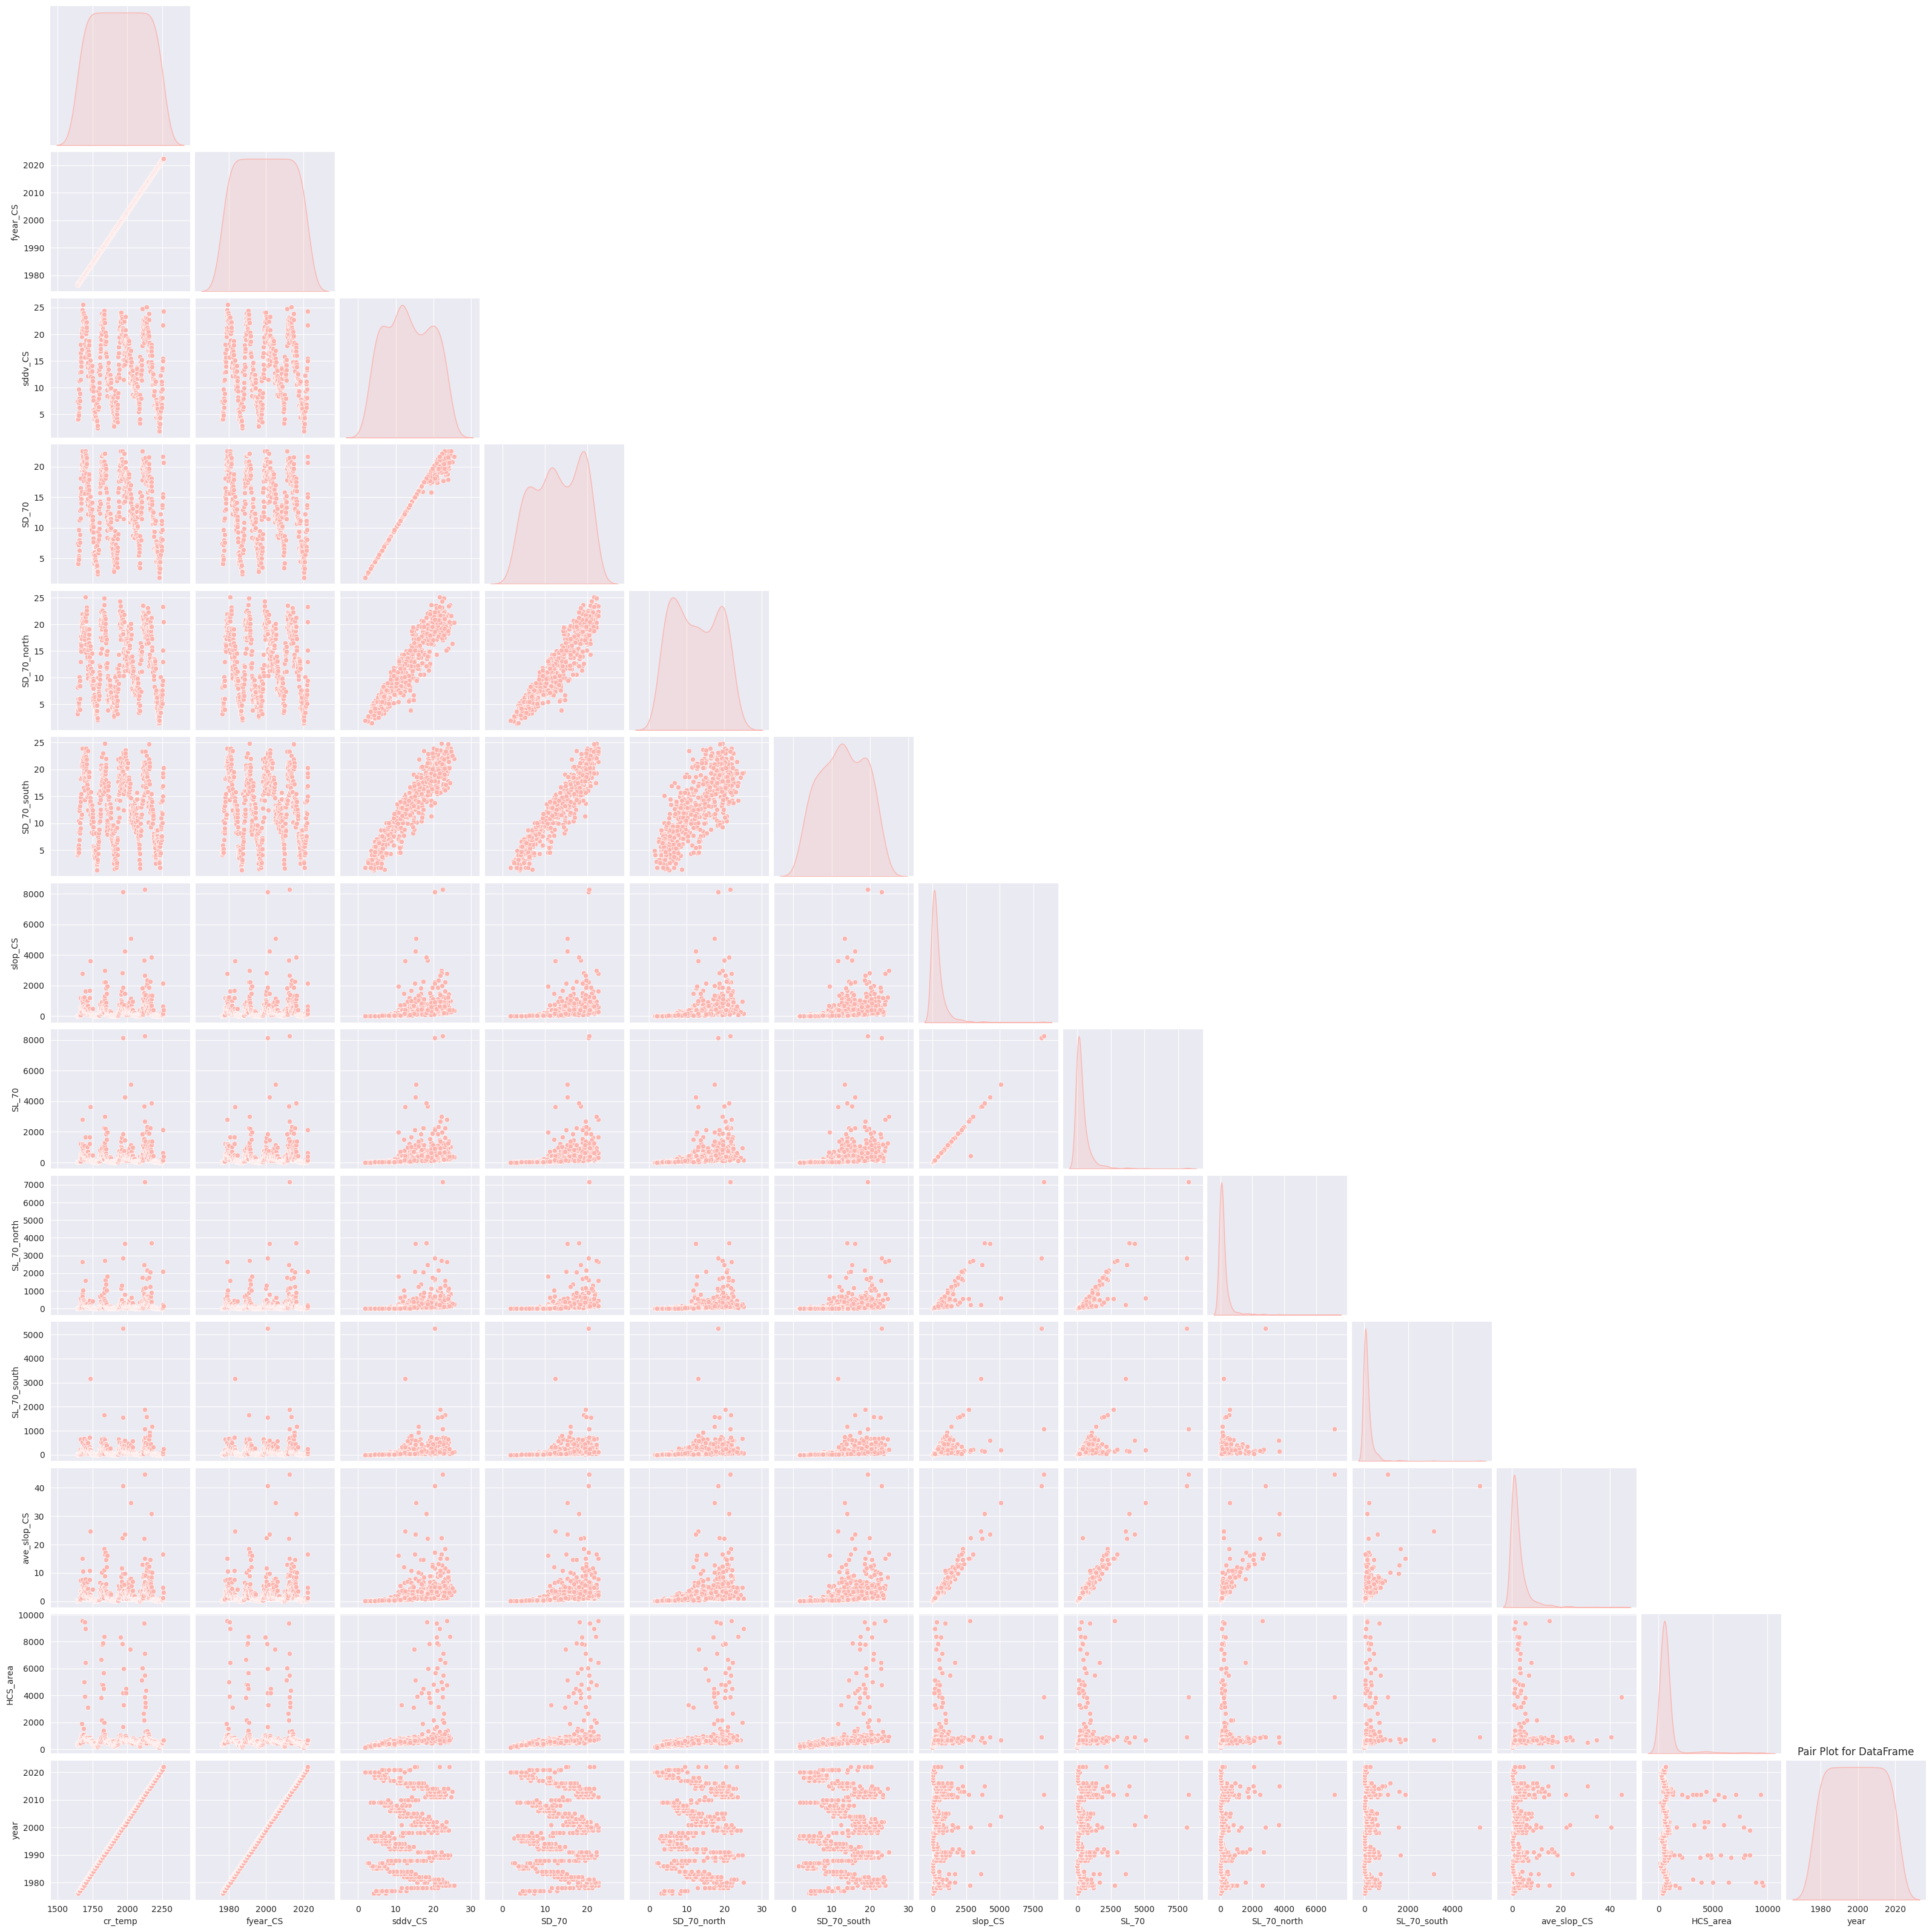

In [11]:
# Set the color palette
sns.set_palette("Pastel1")
 
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
 
# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(hcs_df[numerical_columns],corner=True, diag_kind='kde')
 
plt.title('Pair Plot for DataFrame')
plt.show();

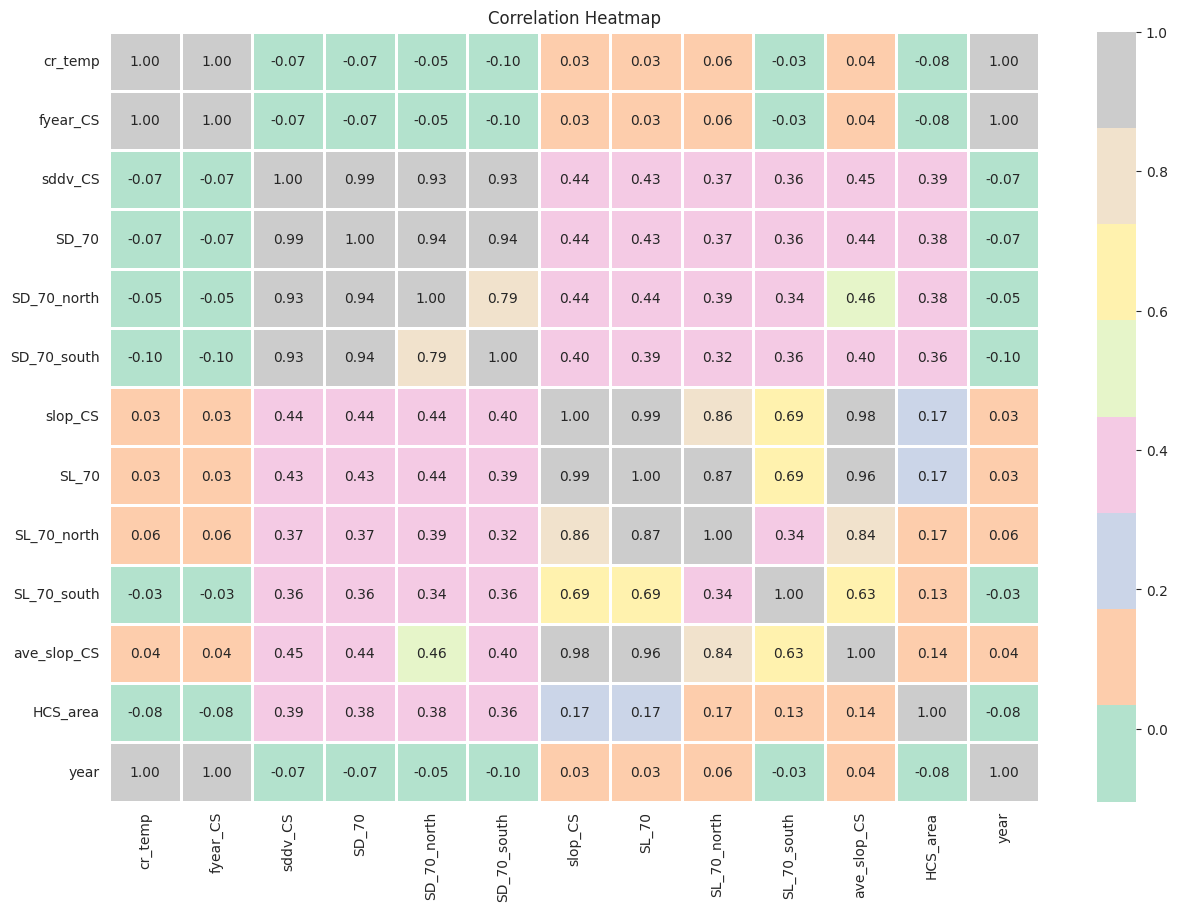

In [12]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))
 
# Using Seaborn to create a heatmap
sns.heatmap(hcs_df[numerical_columns].corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
 
plt.title('Correlation Heatmap')
plt.show()

## Multivariate Analysis

In [ ]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))
 
# Using Seaborn to create a heatmap
sns.heatmap(hcs_df[numerical_columns].corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
 
plt.title('Correlation Heatmap')
plt.show()

### Exploratory Factor Analysis

A factor is a latent variable which describes the association among the number of observed variables.

Assumptions:

- There are no outliers in data.
- Sample size should be greater than the factor.
- There should not be perfect multicollinearity.
- There should not be homoscedasticity between the variables.

Resources: 
- https://www.datacamp.com/tutorial/introduction-factor-analysis

In [18]:
chi_square_value,p_value=calculate_bartlett_sphericity(hcs_df_nona[numerical_columns])
chi_square_value, p_value

(28249.15904668624, 0.0)

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis. In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(hcs_df_nona[numerical_columns])
kmo_model

0.7730835379862939

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [31]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(hcs_df_nona[numerical_columns])

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

array([5.92319956e+00, 3.10860616e+00, 2.12903570e+00, 8.12196536e-01,
       6.68841141e-01, 2.13680800e-01, 9.34328015e-02, 2.18574669e-02,
       1.68943339e-02, 6.59277559e-03, 5.35206376e-03, 3.10669531e-04,
       9.21194397e-10])

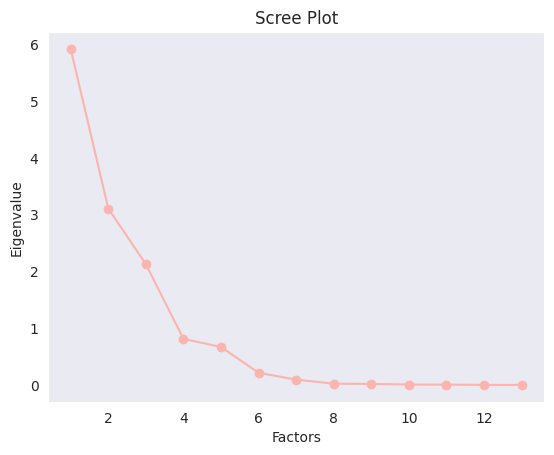

In [34]:
# Create scree plot using matplotlib
plt.scatter(range(1,hcs_df_nona[numerical_columns].shape[1]+1),ev)
plt.plot(range(1,hcs_df_nona[numerical_columns].shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [42]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation="varimax")
fa.fit(hcs_df_nona[numerical_columns], 5)
fa.loadings_

array([[ 0.02413417, -0.06036158,  0.99699326],
       [ 0.02413821, -0.0603545 ,  0.9969938 ],
       [ 0.23823549,  0.97445034, -0.02618907],
       [ 0.23290359,  0.97746986, -0.0241562 ],
       [ 0.26167504,  0.87536949, -0.00562895],
       [ 0.21717514,  0.88151925, -0.06455014],
       [ 0.98465789,  0.21543575,  0.0217186 ],
       [ 0.98440255,  0.21097761,  0.02181873],
       [ 0.80282685,  0.18188991,  0.05165487],
       [ 0.58695381,  0.23501822, -0.02728841],
       [ 0.95600459,  0.22816376,  0.03054642],
       [ 0.08985755,  0.37976429, -0.0577828 ],
       [ 0.02396162, -0.05928811,  0.99698661]])

In [43]:
fa.get_factor_variance()

(array([4.07804281, 3.83467121, 2.99607485]),
 array([0.3136956 , 0.29497471, 0.2304673 ]),
 array([0.3136956 , 0.60867031, 0.8391376 ]))

### PCA
